# Play with Mbs and Bandpasses

In [1]:
# Using this file, we can use "import litebird_sim" even if it is not installed system-wide
import fixpythonpath

In [2]:
import litebird_sim as lbs
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import astropy

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


To use the IMO bundled in `litebird_sim`, one needs to do the following:

In [3]:
start_time = 0.0
imo = lbs.Imo(flatfile_location=lbs.PTEP_IMO_LOCATION)
sim = lbs.Simulation(
    base_path="tut01",
    imo=imo,
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

Otherwise, if you want to install the IMO, follow the instructions [in the IMO documentation](https://litebird-sim.readthedocs.io/en/master/imo.html#configuring-the-imo). You can install the IMO with the command `python -m litebird_sim.install_imo` with the [schema.json](https://github.com/litebird/litebird_sim/tree/master/default_imo) in `litebird_sim` or with any other local copy. In this case, use the following:

In [4]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

## One channel

In [5]:
# Initialize the channel
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

In [6]:
# Parameters of Mbs
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)

In [7]:
# Create the class and run the map generation
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
maps = mbs.run_all()[0]

[2024-03-07 17:04:17,659 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:17,661 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:17,674 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:17,674 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:17,675 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:17,763 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:17,765 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:17,765 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:17,765 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:17,847 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:17,849 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:17,849 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:17,849 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:19,211 INFO MPI#0000] Sigma is 13.079556 arc

In [8]:
maps.keys()

dict_keys(['M1-140', 'Coordinates', 'Mbs_parameters'])

In [9]:
# numpy array with the healpix map
maps["M1-140"].shape

(3, 49152)

In [10]:
# Coordinates of the simulated maps
maps["Coordinates"]

<CoordinateSystem.Galactic: 2>

In [11]:
# Parameters of the Mbs simulations
maps["Mbs_parameters"]

MbsParameters(nside=64, save=False, gaussian_smooth=True, bandpass_int=False, coadd=True, parallel_mc=False, make_noise=False, nmc_noise=1, seed_noise=None, n_split=False, make_cmb=False, cmb_ps_file='', cmb_r=0.0, nmc_cmb=1, seed_cmb=None, make_fg=True, fg_models={'pysm_synch_0': 'pysm_synch_0', 'pysm_freefree_1': 'pysm_freefree_1', 'pysm_dust_0': 'pysm_dust_0'}, make_dipole=False, sun_velocity=None, output_string='date_240307', units='K_CMB', maps_in_ecliptic=False)

## Many channels

In [12]:
# Obtain the info about the instrument from the imo
instrument = lbs.InstrumentInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/instrument_info", imo=imo
)

In [13]:
# Create a list with all the channels
channels = list()
for ch in instrument.channel_names:
    print(ch)
    channels.append(
        lbs.FreqChannelInfo.from_imo(
            url="/releases/vPTEP/satellite/MFT/" + ch + "/channel_info", imo=imo
        )
    )

M1-100
M2-119
M1-140
M2-166
M1-195


In [14]:
# Same as before but using the uuids
channels = list()
for uuid in instrument.channel_objs:
    channel = lbs.FreqChannelInfo.from_imo(url=uuid, imo=imo)
    print(channel.channel)
    channels.append(channel)

M1-100
M2-119
M1-140
M2-166
M1-195


In [15]:
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channels,
)
maps = mbs.run_all()[0]

[2024-03-07 17:04:21,465 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:21,466 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:21,468 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:21,468 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:21,468 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:21,550 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:21,551 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:21,552 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:21,552 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:21,633 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:21,635 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:21,635 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:21,635 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:21,773 INFO MPI#0000] Sigma is 16.052182 arc

In [16]:
for k in maps.keys():
    print(k)

M1-100
M2-119
M1-140
M2-166
M1-195
Coordinates
Mbs_parameters


## Some detectors

In [17]:
# Now we create a list of detectors
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)
wafer = "M02"
orient = "Q"
dets = []
for uuid in channel.detector_objs:
    det = lbs.DetectorInfo.from_imo(url=uuid, imo=imo)
    if (det.wafer == wafer) and (det.orient == orient):
        dets.append(det)

In [18]:
# We run as before but with detector_list instead of channel_list
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2024-03-07 17:04:23,667 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:23,668 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:23,670 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:23,670 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:23,671 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:23,752 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:23,754 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:23,754 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:23,755 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:23,835 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:23,837 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:23,837 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:23,838 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:23,956 INFO MPI#0000] Sigma is 13.079556 arc

[2024-03-07 17:04:26,503 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:26,503 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:26,607 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:26,607 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:26,608 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:26,608 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:26,702 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:26,702 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:26,703 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:26,703 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:26,805 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:26,806 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:26,806 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:26,807 

[2024-03-07 17:04:29,425 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:29,426 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:29,427 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:29,427 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:29,526 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:29,528 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:29,529 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:29,530 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:29,643 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:29,644 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:29,646 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:29,646 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:29,758 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:29,759

[2024-03-07 17:04:32,098 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:32,198 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:32,199 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:32,200 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:32,202 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:32,290 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:32,290 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:32,293 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:32,294 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:32,697 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:32,702 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:32,707 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:32,708 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:33,159 INFO MPI#0000]

[2024-03-07 17:04:35,937 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:35,939 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:35,941 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:36,019 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:36,022 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:36,024 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:36,025 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:36,138 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:36,140 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:36,142 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:36,143 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:36,240 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:36,241 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:36,242 INFO MPI#0000

[2024-03-07 17:04:38,450 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:38,540 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:38,543 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:38,544 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:38,545 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:38,630 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:38,632 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:38,634 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:38,635 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:38,726 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:38,727 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:38,729 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:38,731 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:38,829 INFO MPI#0000]

[2024-03-07 17:04:41,047 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:41,048 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:41,088 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:41,090 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:41,092 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:41,093 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:41,137 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:41,139 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:41,141 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:41,142 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:41,182 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:41,184 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:41,186 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:41,187 

[2024-03-07 17:04:44,630 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:44,631 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:44,632 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:44,632 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:44,702 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:44,703 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:44,704 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:44,704 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:44,786 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:44,787 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-03-07 17:04:44,788 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-03-07 17:04:44,788 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-03-07 17:04:44,873 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-03-07 17:04:44,873

In [19]:
for k in maps.keys():
    print(k)

001_002_030_00A_140_T
001_002_030_00A_140_B
001_002_031_15B_140_T
001_002_031_00B_140_B
001_002_022_15A_140_T
001_002_022_00A_140_B
001_002_039_15A_140_T
001_002_039_00A_140_B
001_002_023_15B_140_T
001_002_023_00B_140_B
001_002_015_15A_140_T
001_002_015_00A_140_B
001_002_047_15A_140_T
001_002_047_00A_140_B
001_002_040_15B_140_T
001_002_040_00B_140_B
001_002_016_15B_140_T
001_002_016_00B_140_B
001_002_009_15A_140_T
001_002_009_00A_140_B
001_002_006_30B_140_T
001_002_006_00B_140_B
001_002_012_30B_140_T
001_002_012_00B_140_B
001_002_019_30B_140_T
001_002_019_00B_140_B
001_002_027_30B_140_T
001_002_027_00B_140_B
001_002_036_30B_140_T
001_002_036_00B_140_B
001_002_044_15B_140_T
001_002_044_00B_140_B
001_002_051_15B_140_T
001_002_051_00B_140_B
001_002_054_15A_140_T
001_002_054_00A_140_B
001_002_048_15B_140_T
001_002_048_00B_140_B
001_002_034_15A_140_T
001_002_034_00A_140_B
001_002_010_15B_140_T
001_002_010_00B_140_B
001_002_004_15A_140_T
001_002_004_00A_140_B
001_002_001_30B_140_T
001_002_00

## Now integrating over a top-hat bandpass

In [20]:
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

In [21]:
# We generate maps with an without band integration
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsnoint = mbs.run_all()[0]

params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsint = mbs.run_all()[0]

[2024-03-07 17:04:46,856 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:46,858 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:46,859 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:46,859 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:46,860 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:46,939 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:46,940 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:46,941 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:46,941 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:47,027 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:47,029 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:47,029 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:47,029 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:47,176 INFO MPI#0000] Sigma is 13.079556 arc

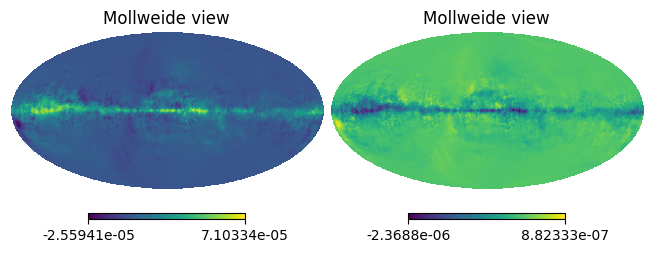

In [22]:
hp.mollview(mapsint["M1-140"][1], sub=121)
hp.mollview((mapsnoint["M1-140"] - mapsint["M1-140"])[1], sub=122)

## Now with a customized bandpass

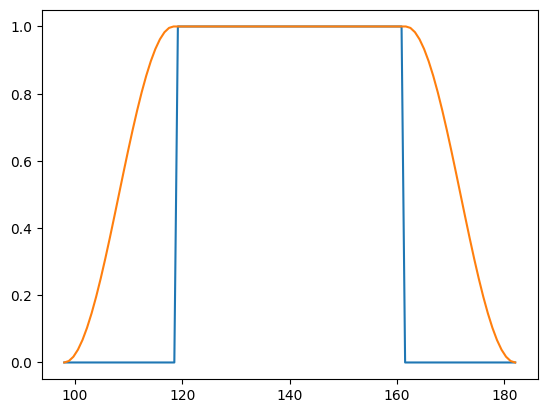

In [23]:
# We change the shape of the bands, in channel1 top-hat in channel2 top-hat with cosine tails

channel1 = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channel1.bandcenter_ghz,
    bandwidth_ghz=channel1.bandwidth_ghz,
    bandtype="top-hat-cosine",
    nsamples_inband=100,
)
channel2 = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)
channel2.band = band

plt.plot(channel1.band.freqs_ghz, channel1.band.weights, label="Ideal band")
plt.plot(channel2.band.freqs_ghz, channel2.band.weights, label="Ideal band")

In [24]:
# Here we do the comparison
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel1,
)
mapsth = mbs.run_all()[0]

mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel2,
)
mapsthc = mbs.run_all()[0]

[2024-03-07 17:04:48,933 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:48,934 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:48,935 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:48,936 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:48,936 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:49,021 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:49,022 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:49,023 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:49,023 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:49,109 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:49,110 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:49,110 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:49,111 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:49,219 INFO MPI#0000] Removing 64/128 points

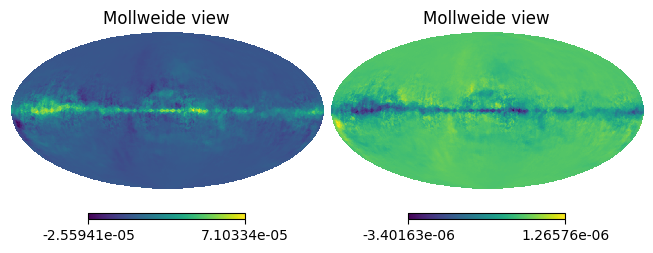

In [25]:
hp.mollview(mapsth["M1-140"][1], sub=121)
hp.mollview((mapsth["M1-140"] - mapsthc["M1-140"])[1], sub=122)

## Scan the sky

In [26]:
# Now we do a simple simulation of 1 hour with 4 detectors
telescope = "MFT"
channel = "M1-140"
detlist = [
    "001_004_060_30A_140_T",
    "001_003_000_00A_140_B",
    "001_003_001_00B_140_T",
    "001_003_002_45A_140_B",
]

In [27]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="./tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

Can't resample if no sampler is built and/or provided, initializing the sampler and interpolating the band


/home/serenagiardiello/lbs/litebird_sim/litebird_sim/bandpasses.py:271: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]
/home/serenagiardiello/lbs/litebird_sim/litebird_sim/bandpasses.py:271: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]


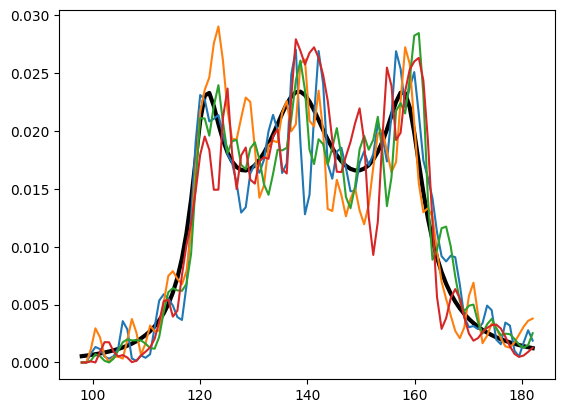

In [28]:
# Load the definition of the instrument (LFT)
sim.set_instrument(
    lbs.InstrumentInfo.from_imo(
        imo,
        f"/releases/vPTEP/satellite/{telescope}/instrument_info",
    )
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    imo, f"/releases/vPTEP/satellite/{telescope}/{channel}/channel_info"
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channelinfo.bandcenter_ghz,
    bandwidth_ghz=channelinfo.bandwidth_ghz,
    bandtype="cheby",
    nsamples_inband=100,
    normalize=True,
)

plt.plot(band.freqs_ghz, band.weights, lw=3, color="k")

dets = []
for namedet in detlist:
    det = lbs.DetectorInfo.from_imo(
        url=f"/releases/vPTEP/satellite/{telescope}/{channel}/{namedet}/detector_info",
        imo=imo,
    )
    det.quat = [0.0, 0.0, 0.0, 1.0]
    det.band = band
    det.fwhm_arcmin *= np.random.normal(1.0, 0.01)
    det.band.weights = band.bandpass_resampling()
    dets.append(det)
    plt.plot(band.freqs_ghz, det.band.weights)

In [29]:
sim.set_scanning_strategy(imo_url=f"/releases/vPTEP/satellite/scanning_parameters/")

sim.create_observations(
    detectors=dets,
    n_blocks_det=1,
    n_blocks_time=1,  # blocks different from one if parallelizing
)

In [30]:
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2024-03-07 17:04:53,201 INFO MPI#0000] generating and saving fg simulations
[2024-03-07 17:04:53,202 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-03-07 17:04:53,204 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:53,205 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:53,205 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:53,289 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-03-07 17:04:53,291 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:53,291 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:53,292 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:53,379 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-03-07 17:04:53,381 INFO MPI#0000] NSIDE = 512
[2024-03-07 17:04:53,381 INFO MPI#0000] ORDERING = RING in fits file
[2024-03-07 17:04:53,382 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-03-07 17:04:56,873 INFO MPI#0000] Removing 98/100 points

In [31]:
sim.set_hwp(
    lbs.IdealHWP(
        sim.instrument.hwp_rpm * 2 * np.pi / 60,
    ),
)
sim.compute_pointings()

In [32]:
sim.fill_tods(maps)

Text(0, 0.5, 'Signal [K]')

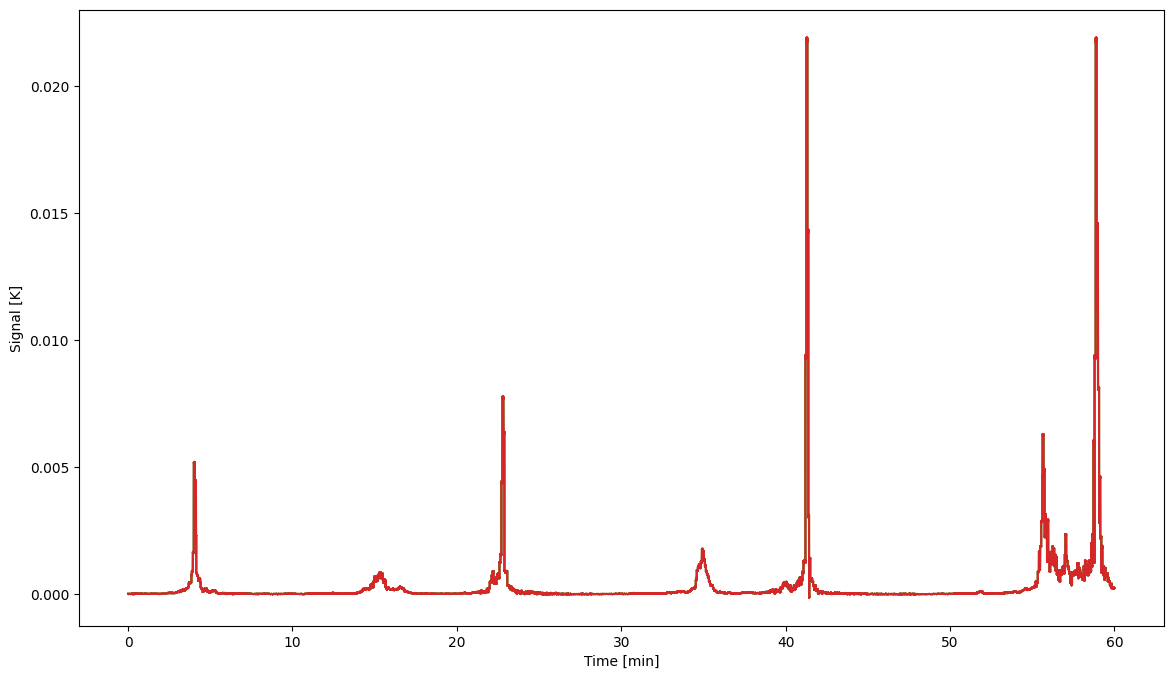

In [33]:
times_min = (sim.observations[0].get_times() - sim.observations[0].start_time) / 60.0
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1])
plt.plot(times_min, sim.observations[0].tod[2])
plt.plot(times_min, sim.observations[0].tod[3])

plt.xlabel("Time [min]")
plt.ylabel("Signal [K]")

Text(0, 0.5, '$\\Delta$ Signal [K]')

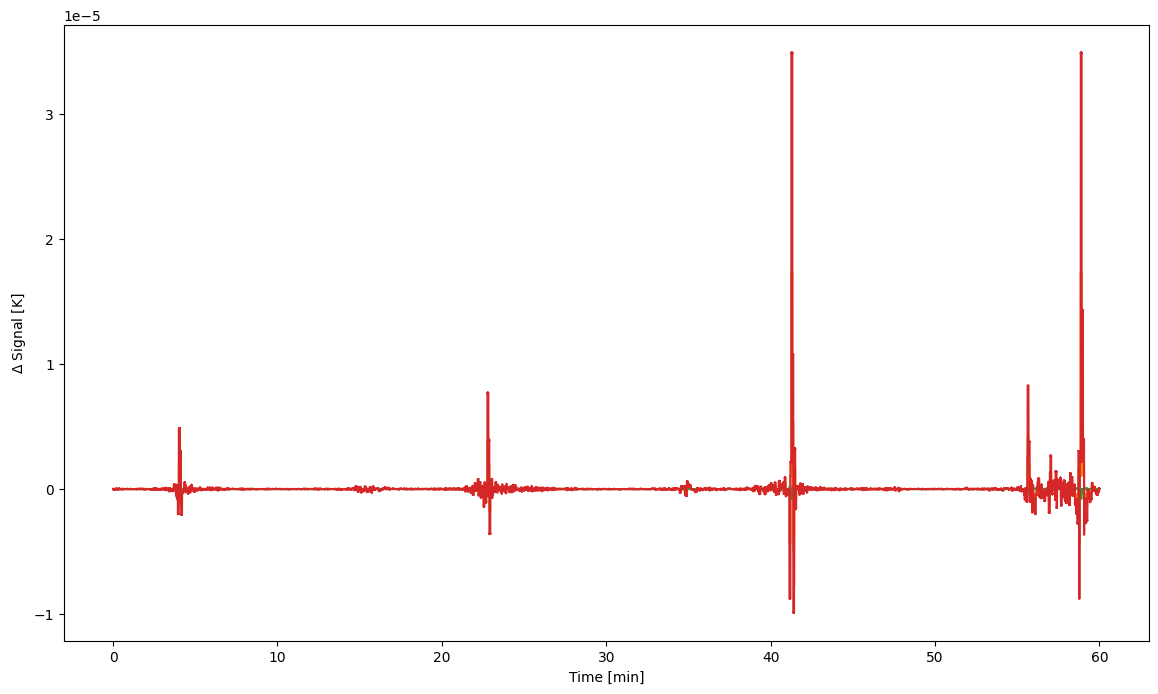

In [34]:
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[2] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[3] - sim.observations[0].tod[0])

plt.xlabel("Time [min]")
plt.ylabel(r"$\Delta$ Signal [K]")